# Null geodesics with $b < b_{\rm crit}$

This Jupyter/SageMath notebook is relative to the lectures
[Geometry and physics of black holes](http://luth.obspm.fr/~luthier/gourgoulhon/bh16/).

To run it, you must start SageMath with `sage -n jupyter`.

In [1]:
%display latex

In [2]:
P(u, b) = 2*u^3 - u^2 + 1/b^2
P(u, b)

2*u^3 - u^2 + 1/b^2

In [3]:
bc = 3*sqrt(3)
assume(b < bc)

### The unique real zero of $P_b$

In [4]:
xi = bc/b - sqrt((bc/b)^2 - 1)
u_neg(b) = (1 - xi^(2/3) - xi^(-2/3))/6
u_neg(b)

-1/6*(-sqrt(27/b^2 - 1) + 3*sqrt(3)/b)^(2/3) - 1/6/(-sqrt(27/b^2 - 1) + 3*sqrt(3)/b)^(2/3) + 1/6

Check:

In [5]:
P(u_neg(b), b).simplify_full().factor()

0

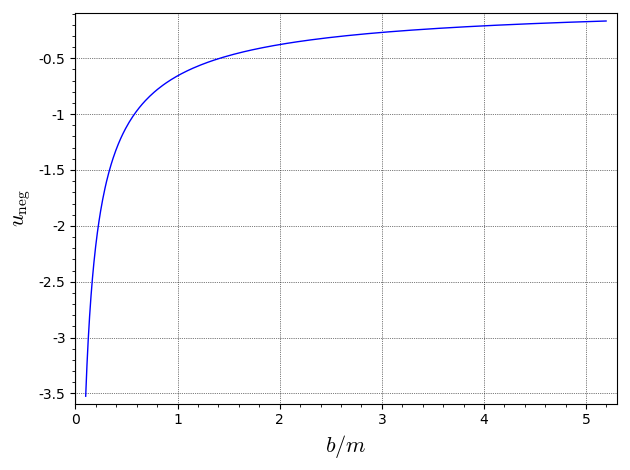

In [6]:
plot(u_neg, (0.1, bc), axes_labels=[r'$b/m$', r'$u_{\rm neg}$'],
     frame=True, gridlines=True)

In [7]:
u_neg(b).taylor(b, 0, 2)

1/324*2^(2/3)*b^(4/3) - 1/36*2^(1/3)*b^(2/3) - 1/2*2^(2/3)/b^(2/3) + 1/6

In [8]:
lim(u_neg(b), b=0)

-Infinity

In [9]:
u0(b) = 1/4 - u_neg(b)/2
us(b) = sqrt(u_neg(b)*(3*u_neg(b) - 1)) + u_neg(b)

In [10]:
lim(u0(b), b=bc)

1/3

In [11]:
lim(us(b), b=bc)

1/3

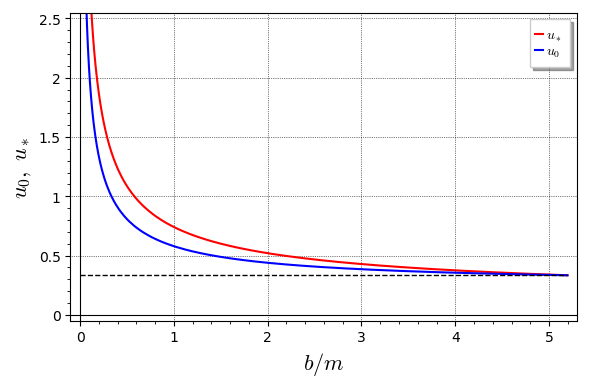

In [12]:
g = plot(us, (0.05, bc), legend_label=r'$u_*$',
         thickness=1.5, color='red',
         axes_labels=[r'$b/m$', r'$u_0,\ u_*$'],
         frame=True, gridlines=True) \
    + plot(u0, (0.05, bc), legend_label=r'$u_0$',
           thickness=1.5, color='blue') \
    + line([(0, 1/3), (bc, 1/3)], color='black', linestyle='--')
show(g, ymin=0, ymax=2.5)

In [13]:
g.save("gis_u0_us_b.pdf", ymin=0, ymax=2.5)

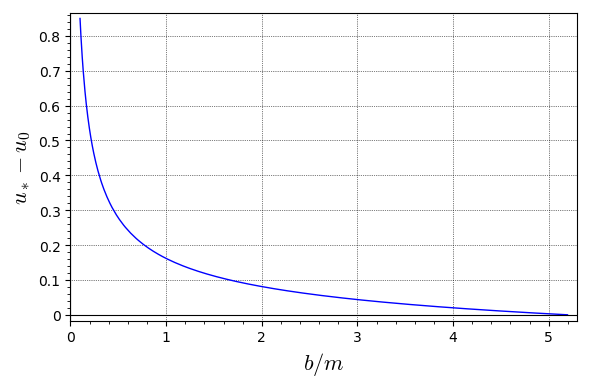

In [14]:
plot(lambda b: us(b) - u0(b), (0.1, bc), axes_labels=[r'$b/m$', r'$u_* - u_0$'],
     frame=True, gridlines=True)

### Factorization of $P_b$:

In [15]:
P1 = 2*(u - u_neg(b))*((u - 1/4 + u_neg(b)/2)^2 + (6*u_neg(b) + 1)*(2*u_neg(b) - 1)/16)
(P1 - P(u, b)).simplify_full().factor()

0

In [16]:
P2 = 2*(u - u_neg(b))*((u - u0(b))^2 + (us(b) - u_neg(b))^2 - (u0(b) - u_neg(b))^2)
(P2 - P(u, b)).simplify_full().factor()

0

###  Elliptic integral

In [17]:
un = var('u_n')
a12 = (6*un + 1)*(2*un - 1)/16
a12

1/16*(6*u_n + 1)*(2*u_n - 1)

In [18]:
b1 = 1/4 - un/2
b1

-1/2*u_n + 1/4

In [19]:
A = sqrt((b1 - un)^2 + a12).simplify_full()
A

sqrt(3*u_n^2 - u_n)

In [20]:
Ab(b) = A.subs({un: u_neg(b)}).simplify_full().factor()
Ab(b)

1/6*sqrt(3)*sqrt(((-(b*sqrt(-(b^2 - 27)/b^2) - 3*sqrt(3))/b)^(8/3) + (-(b*sqrt(-(b^2 - 27)/b^2) - 3*sqrt(3))/b)^(4/3) + 1)/(-(b*sqrt(-(b^2 - 27)/b^2) - 3*sqrt(3))/b)^(4/3))

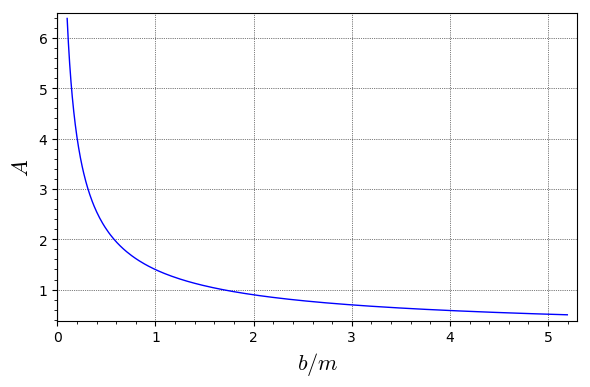

In [21]:
plot(Ab, (0.1, bc), axes_labels=[r'$b/m$', r'$A$'],
     frame=True, gridlines=True)

In [22]:
Ab(bc)

1/2

In [23]:
k = sqrt((A + b1 - un)/(2*A))
k

1/2*sqrt(1/2)*sqrt(-(6*u_n - 4*sqrt(3*u_n^2 - u_n) - 1)/sqrt(3*u_n^2 - u_n))

In [24]:
kb(b) = k.subs({un: u_neg(b)}).simplify_full().factor()
kb

b |--> 1/12*sqrt(6)*sqrt(3)*sqrt(2)*sqrt((sqrt(3)*(-(b*sqrt(-(b^2 - 27)/b^2) - 3*sqrt(3))/b)^(4/3) + 2*(-(b*sqrt(-(b^2 - 27)/b^2) - 3*sqrt(3))/b)^(2/3)*sqrt(((-(b*sqrt(-(b^2 - 27)/b^2) - 3*sqrt(3))/b)^(8/3) + (-(b*sqrt(-(b^2 - 27)/b^2) - 3*sqrt(3))/b)^(4/3) + 1)/(-(b*sqrt(-(b^2 - 27)/b^2) - 3*sqrt(3))/b)^(4/3)) + sqrt(3))/((-(b*sqrt(-(b^2 - 27)/b^2) - 3*sqrt(3))/b)^(2/3)*sqrt(((-(b*sqrt(-(b^2 - 27)/b^2) - 3*sqrt(3))/b)^(8/3) + (-(b*sqrt(-(b^2 - 27)/b^2) - 3*sqrt(3))/b)^(4/3) + 1)/(-(b*sqrt(-(b^2 - 27)/b^2) - 3*sqrt(3))/b)^(4/3))))

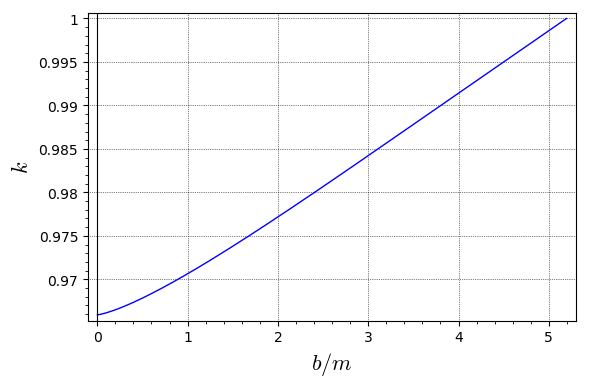

In [25]:
plot(kb, (0.001, bc), axes_labels=[r'$b/m$', r'$k$'],
     frame=True, gridlines=True)

In [26]:
kb(b).taylor(b, 0, 2)

1/288*sqrt(6)*2^(1/3)*b^(4/3)*sqrt(3*sqrt(3) + 6)/(2*sqrt(3)*2^(1/6) + 3*2^(1/6)) + 1/12*sqrt(6)*sqrt(2)*sqrt(3*sqrt(3) + 6)

In [27]:
k0 = lim(kb(b), b=0)
k0

1/12*sqrt(6)*sqrt(2)*sqrt(3*sqrt(3) + 6)

In [28]:
n(k0)

0.965925826289068

In [29]:
k0 = k0.canonicalize_radical()
k0

1/2*sqrt(sqrt(3) + 2)

In [30]:
n(k0)

0.965925826289068

In [31]:
t = (A + un - u)/(A - un + u)
t

-(u - u_n - sqrt(3*u_n^2 - u_n))/(u - u_n + sqrt(3*u_n^2 - u_n))

In [32]:
tb(u, b) = t.subs({un: u_neg(b)}).simplify_full().factor()
tb(u, b)

-(6*u*(-(b*sqrt(-(b^2 - 27)/b^2) - 3*sqrt(3))/b)^(2/3) - sqrt(3)*(-(b*sqrt(-(b^2 - 27)/b^2) - 3*sqrt(3))/b)^(2/3)*sqrt(((-(b*sqrt(-(b^2 - 27)/b^2) - 3*sqrt(3))/b)^(8/3) + (-(b*sqrt(-(b^2 - 27)/b^2) - 3*sqrt(3))/b)^(4/3) + 1)/(-(b*sqrt(-(b^2 - 27)/b^2) - 3*sqrt(3))/b)^(4/3)) + (-(b*sqrt(-(b^2 - 27)/b^2) - 3*sqrt(3))/b)^(4/3) - (-(b*sqrt(-(b^2 - 27)/b^2) - 3*sqrt(3))/b)^(2/3) + 1)/(6*u*(-(b*sqrt(-(b^2 - 27)/b^2) - 3*sqrt(3))/b)^(2/3) + sqrt(3)*(-(b*sqrt(-(b^2 - 27)/b^2) - 3*sqrt(3))/b)^(2/3)*sqrt(((-(b*sqrt(-(b^2 - 27)/b^2) - 3*sqrt(3))/b)^(8/3) + (-(b*sqrt(-(b^2 - 27)/b^2) - 3*sqrt(3))/b)^(4/3) + 1)/(-(b*sqrt(-(b^2 - 27)/b^2) - 3*sqrt(3))/b)^(4/3)) + (-(b*sqrt(-(b^2 - 27)/b^2) - 3*sqrt(3))/b)^(4/3) - (-(b*sqrt(-(b^2 - 27)/b^2) - 3*sqrt(3))/b)^(2/3) + 1)

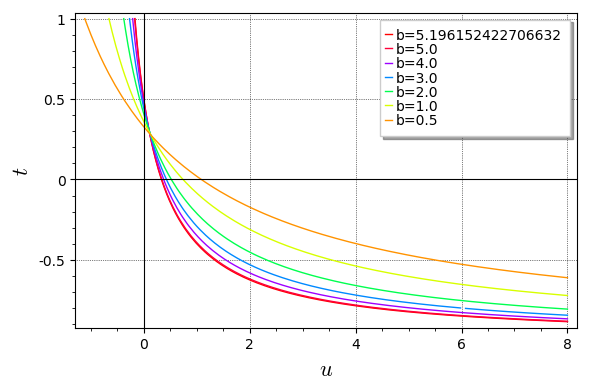

In [33]:
g = Graphics()
for b1 in [bc, 5, 4, 3, 2, 1, 1/2]:
    g += plot(tb(u, b1), (u, u_neg(b1), 8), 
              legend_label="b={}".format(float(b1)), 
              color=hue(b1/bc), axes_labels=[r'$u$', r'$t$'], 
              frame=True, gridlines=True)
g

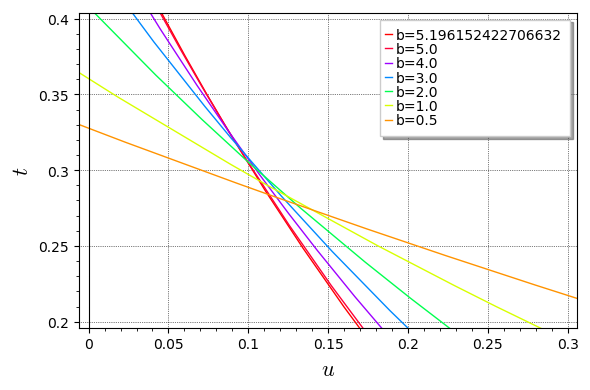

In [34]:
show(g, xmin=0, xmax=0.3, ymin=0.2, ymax=0.4)

In [35]:
unx = - 1/6 - x

In [36]:
bx = bc - 81*sqrt(3)/4*x
bx

-81/4*sqrt(3)*x + 3*sqrt(3)

In [37]:
bool(u_neg(bx).simplify_full().taylor(x, 0, 1) == unx)

True

In [38]:
A.subs({un: unx}).taylor(x, 0, 1)

2*x + 1/2

In [39]:
k.subs({un: unx}).taylor(x, 0, 1)

-1/4*x + 1

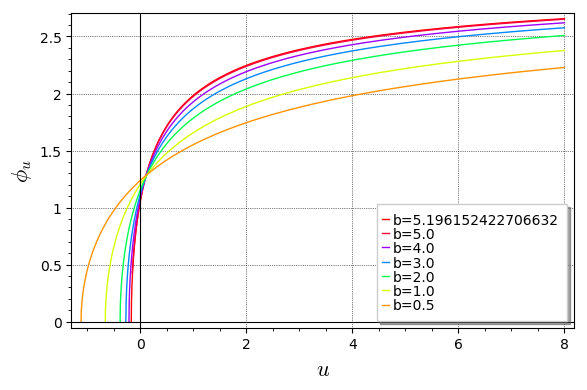

In [40]:
g = Graphics()
for b1 in [bc, 5, 4, 3, 2, 1, 1/2]:
    g += plot(arccos(tb(u, b1)), (u, u_neg(b1), 8), 
              legend_label="b={}".format(float(b1)), 
              color=hue(b1/bc), axes_labels=[r'$u$', r'$\phi_u$'], 
              frame=True, gridlines=True)
g

In [41]:
forget()
assume(u>0)
assume(u<pi/2)
integrate(1/cos(x), x, 0, u, algorithm='giac')

1/2*log(sin(u) + 1) - 1/2*log(-sin(u) + 1)

In [42]:
forget()
assume(u>pi/2)
assume(u<pi)
integrate(1/cos(x), x, pi/2, u, algorithm='giac')

-Infinity